<a href="https://colab.research.google.com/github/Tselovanska/B2B_Sales_pipeline_analysis_for_SaaS_Business/blob/main/B2B_sales_analysis_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Main/Portfolio_cases/B2B_Sales_pipeline_analysis_for_SaaS_Business
data = pd.read_csv("B2B_Sales_Win_Loss_data.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Main/Portfolio_cases/B2B_Sales_pipeline_analysis_for_SaaS_Business


,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [ ]:
print(data.shape)

(78025, 13)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68768 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   opportunity_id                  68768 non-null  object
 1   technology
primary              68768 non-null  object
 2   city                            68768 non-null  object
 3   b2b_sales_medium                68768 non-null  object
 4   sales_velocity                  68768 non-null  int64 
 5   opportunity_status              68768 non-null  object
 6   sales_stage_iterations          68768 non-null  int64 
 7   opportunity_size_(usd)          68768 non-null  int64 
 8   client_revenue_sizing           68768 non-null  object
 9   client_employee_sizing          68768 non-null  object
 10  business_from_client_last_year  68768 non-null  object
 11  compete_intel                   68768 non-null  object
 12  opportunity_sizing              68768 non-null  obj

In [ ]:
data['Compete Intel'].value_counts(dropna=False)
data['Compete Intel'].value_counts(dropna=False, normalize=True) * 100



,proportion
Compete Intel,
Unknown,72.699776
Known,15.436078
NaN,11.864146


In [ ]:
# Exclude records with unknown 'Compete Intel' values (11%)
# — unclear whether missing means "no data" or "no intel", so removing to keep consistency.
data = data[data['Compete Intel'].notna()]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68768 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  68768 non-null  object
 1   Technology
Primary              68768 non-null  object
 2   City                            68768 non-null  object
 3   B2B Sales Medium                68768 non-null  object
 4   Sales Velocity                  68768 non-null  int64 
 5   Opportunity Status              68768 non-null  object
 6   Sales Stage Iterations          68768 non-null  int64 
 7   Opportunity Size (USD)          68768 non-null  int64 
 8   Client Revenue Sizing           68768 non-null  object
 9   Client Employee Sizing          68768 non-null  object
 10  Business from Client Last Year  68768 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              68768 non-null  obj

In [ ]:
data.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,68768.000000,68768.000000,68768.000000
mean,44.154389,2.939550,30579.244969
std,26.601754,1.488389,21100.151721
min,0.000000,1.000000,0.000000
25%,20.000000,2.000000,14806.750000
50%,44.000000,2.000000,30384.000000
75%,65.000000,3.000000,43420.000000
max,148.000000,23.000000,149981.000000


In [ ]:
duplicate_rows = data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0        False
1        False
2        False
3        False
4        False
         ...  
78020    False
78021    False
78022    False
78023    False
78024    False
Length: 68768, dtype: bool
0


In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
for col in data.select_dtypes('object').columns:
    print(col, ":", data[col].nunique(), "unique values")

opportunity_id : 68768 unique values
technology
primary : 4 unique values
city : 7 unique values
b2b_sales_medium : 5 unique values
opportunity_status : 2 unique values
client_revenue_sizing : 5 unique values
client_employee_sizing : 5 unique values
business_from_client_last_year : 5 unique values
compete_intel : 2 unique values
opportunity_sizing : 7 unique values


/tmp/ipython-input-2613289935.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='opportunity_status', data=data, palette='pastel', ax=axes[0])


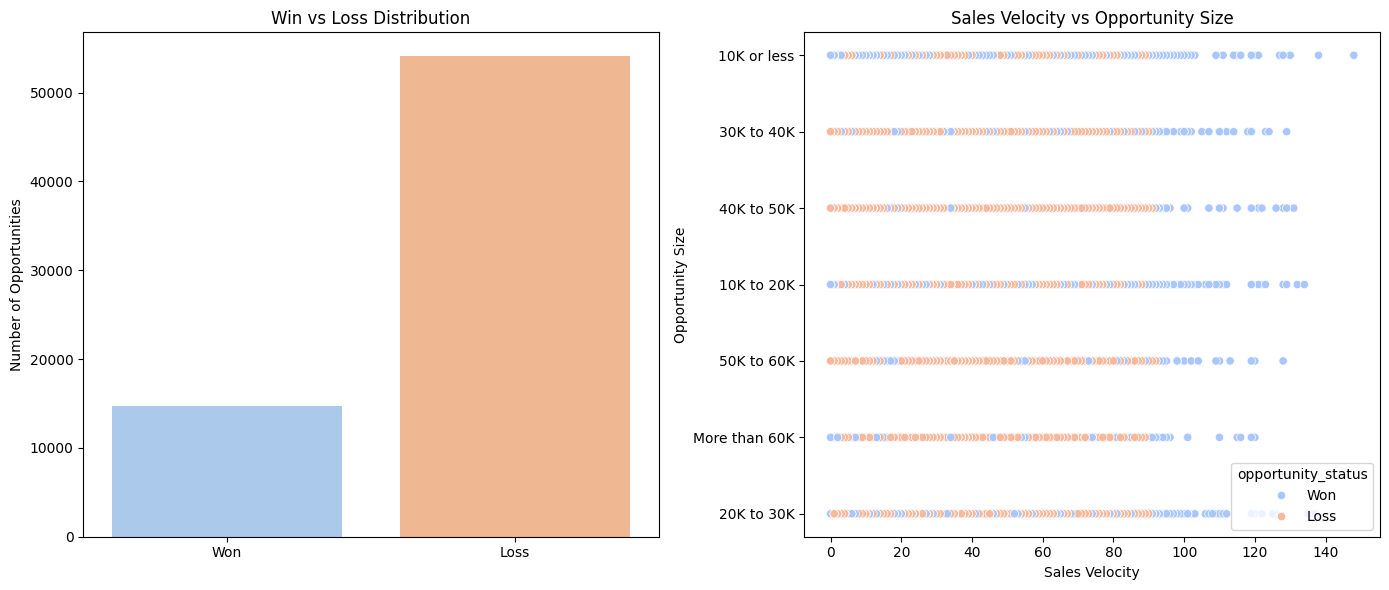

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='opportunity_status', data=data, palette='pastel', ax=axes[0])
axes[0].set_title('Win vs Loss Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Opportunities')

sns.scatterplot(
    x='sales_velocity',
    y='opportunity_sizing',
    hue='opportunity_status',
    data=data,
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Sales Velocity vs Opportunity Size')
axes[1].set_xlabel('Sales Velocity')
axes[1].set_ylabel('Opportunity Size')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3583746312.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


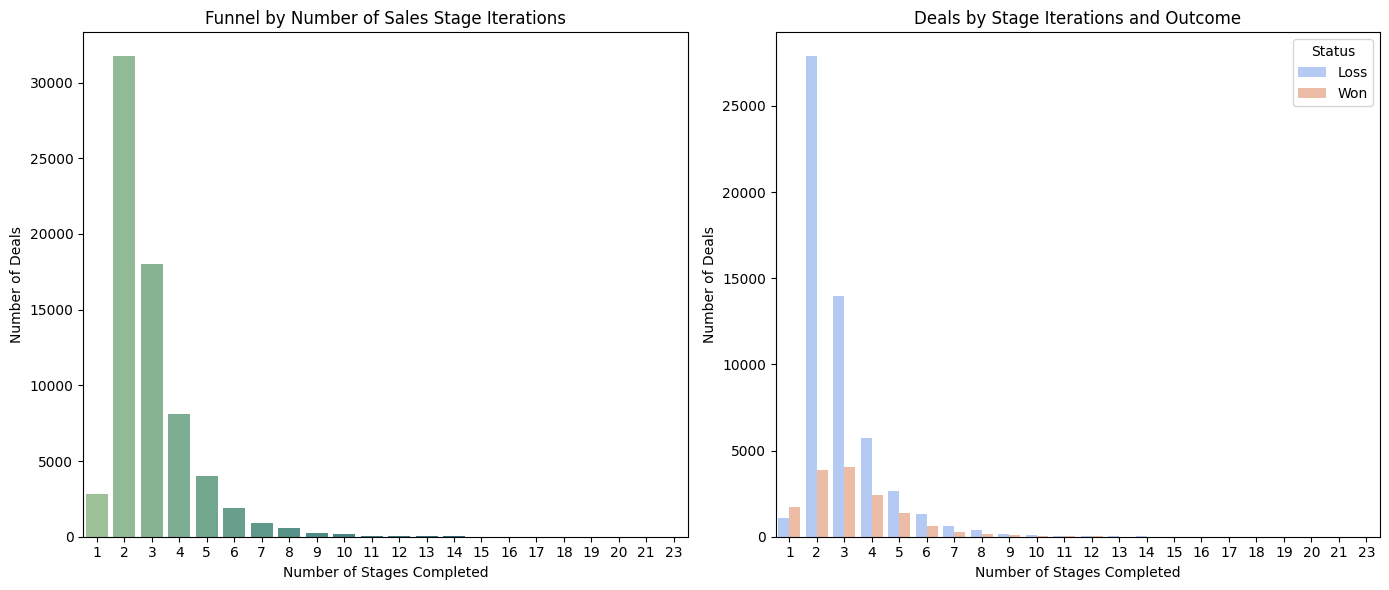

In [ ]:
funnel = (
    data.groupby('sales_stage_iterations')
      .size()
      .reset_index(name='deals_count')
      .sort_values('sales_stage_iterations')
)

funnel_status = (
    data.groupby(['sales_stage_iterations', 'opportunity_status'])
      .size()
      .reset_index(name='deals_count')
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    x='sales_stage_iterations',
    y='deals_count',
    data=funnel,
    palette='crest',
    ax=axes[0]
)
axes[0].set_title('Funnel by Number of Sales Stage Iterations')
axes[0].set_xlabel('Number of Stages Completed')
axes[0].set_ylabel('Number of Deals')

sns.barplot(
    x='sales_stage_iterations',
    y='deals_count',
    hue='opportunity_status',
    data=funnel_status,
    palette='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Deals by Stage Iterations and Outcome')
axes[1].set_xlabel('Number of Stages Completed')
axes[1].set_ylabel('Number of Deals')
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3014592579.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='b2b_sales_medium', y='Win Rate (%)', data=win_rate, palette='crest', ax=axes[0])
/tmp/ipython-input-3014592579.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Win Rate (%)', y='city',
/tmp/ipython-input-3014592579.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='compete_intel', y='Win Rate (%)', data=win_rate_intel, palette='viridis', ax=axes[2])


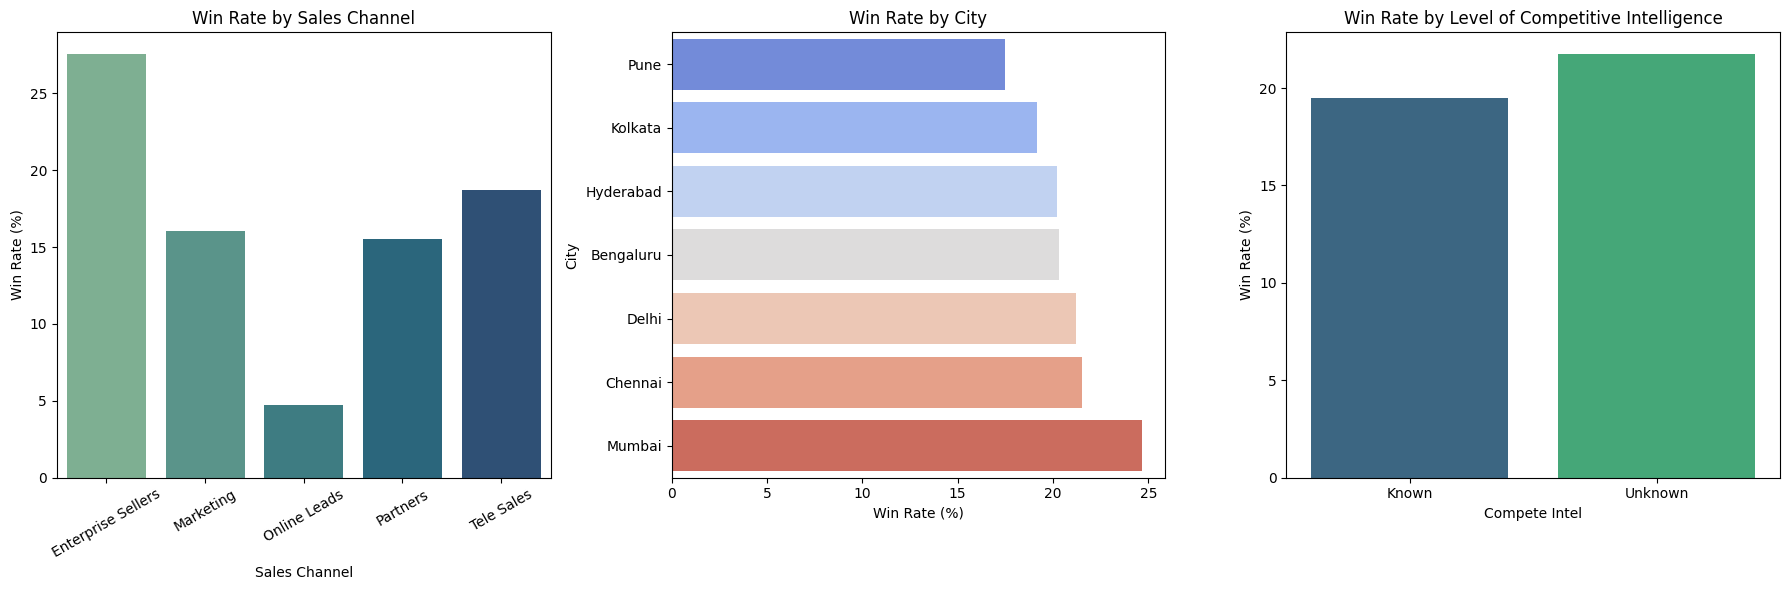

In [ ]:
win_rate = (
    data.groupby('b2b_sales_medium')['opportunity_status']
      .apply(lambda x: (x == 'Won').mean() * 100)
      .reset_index(name='Win Rate (%)')
)

win_rate_city = (
    data.groupby('city')['opportunity_status']
      .apply(lambda x: (x == 'Won').mean() * 100)
      .reset_index(name='Win Rate (%)')
)

win_rate_intel = (
    data.groupby('compete_intel')['opportunity_status']
      .apply(lambda x: (x == 'Won').mean() * 100)
      .reset_index(name='Win Rate (%)')
)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


sns.barplot(x='b2b_sales_medium', y='Win Rate (%)', data=win_rate, palette='crest', ax=axes[0])
axes[0].set_title('Win Rate by Sales Channel')
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Win Rate (%)')
axes[0].tick_params(axis='x', rotation=30)


sns.barplot(x='Win Rate (%)', y='city',
            data=win_rate_city.sort_values('Win Rate (%)'),
            palette='coolwarm', ax=axes[1])
axes[1].set_title('Win Rate by City')
axes[1].set_xlabel('Win Rate (%)')
axes[1].set_ylabel('City')


sns.barplot(x='compete_intel', y='Win Rate (%)', data=win_rate_intel, palette='viridis', ax=axes[2])
axes[2].set_title('Win Rate by Level of Competitive Intelligence')
axes[2].set_xlabel('Compete Intel')
axes[2].set_ylabel('Win Rate (%)')


plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('/content/drive/MyDrive/Main/Portfolio_cases/B2B_Sales_pipeline_analysis_for_SaaS_Business/clean_sales_data.csv', index=False)